In [1]:
from basicgeo import P2, P3
from wingshape import WingShape
from parapolygraph import ParamPolyGraph, trimeshesflattener 
import numpy, math

#freecadappimage = "freecad"   # nixos install
#freecadappimage = "/home/timbo/software/FreeCAD_0.19-24054-Linux-Conda_glibc2.12-x86_64.AppImage"
freecadappimage = "C:\\Program Files\\FreeCAD 0.20\\bin\\FreeCAD.exe" 


In [2]:
import pygmsh

capradius = 1
sphereradius = 2
anglestep = 5

def meshCutSphere(midxcuts, brightside, mesh_size):
    d = 90
    dsteps = int(2+d*2/anglestep)
    
    rimangles = numpy.linspace(-d, d, dsteps) if brightside else numpy.linspace(d, 360-d, dsteps)
    rimloop = [ P2(math.cos(math.radians(a)), math.sin(math.radians(a)))*capradius  for a in rimangles ]
    midcut = [ ]
    for i, m in enumerate(midxcuts):
        ly = ((i+1)/(len(midxcuts)+1))*2 - 1
        lx = m*(1 - math.sqrt(ly**2))
        midcut.append(P2(lx, ly)*capradius)
    if brightside:
        midcut.reverse()
    polyloop = midcut + rimloop
    with pygmsh.geo.Geometry() as g:
        g.add_polygon(polyloop, mesh_size=mesh_size)
        mesh = g.generate_mesh()
    uvpts = [ P2(p[0], p[1])  for p in mesh.points ]
    pts = [ P3(p[0], p[1], math.sqrt(sphereradius**2 - p.Lensq()))  for p in uvpts ]
    surfacemesh = { "polyloop":polyloop,
                    "uvpts":uvpts, 
                    "pts":numpy.array(pts),
                    "tris":mesh.cells_dict["triangle"],
                  }
    return surfacemesh

def flatSplitSphere(midxcuts, mesh_size = 0.05):
    if min(midxcuts) < -0.5 or max(midxcuts) > 0.5:
        return None
    surfacemeshes = [  meshCutSphere(midxcuts, False, mesh_size), meshCutSphere(midxcuts, True, mesh_size) ]
    trimeshesflattener(surfacemeshes, freecadappimage)
    return surfacemeshes

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=296, tris=524) flattened
mesh (pts=262, tris=456) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]



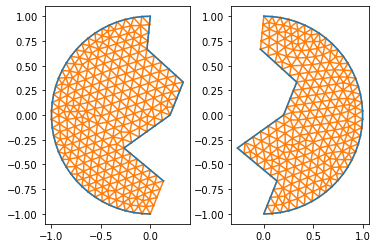

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt

midxcuts = [0.4, -0.4, 0.2, 0.5, -0.1 ]

surfacemeshes = flatSplitSphere(midxcuts, mesh_size=0.1)

for i in range(2):
    A = plt.subplot(1,2,i+1)
    surfacemesh = surfacemeshes[i]
    pl = numpy.array(surfacemesh["polyloop"])
    A.plot(pl[:,0], pl[:,1])
    A.triplot(surfacemesh["pts"][:,0], surfacemesh["pts"][:,1], surfacemesh["tris"])
    A.set_aspect("equal")


In [4]:
surfacemeshes = flatSplitSphere(midxcuts, mesh_size = 0.1)

def tomWeights(surfacemeshes):
    weightedChanges = []
    for surfacemesh in surfacemeshes:
        area = numpy.sum(surfacemesh["triareas"])
        farea = numpy.sum(surfacemesh["ftriareas"])
        change = 0
        for i in range(len(surfacemesh["ftriareas"])):
            change = change +abs(surfacemesh["triareas"][i]-surfacemesh["ftriareas"][i])
        weightedChanges.append(change/(area))
    return weightedChanges

1/sum(tomWeights(surfacemeshes))


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=296, tris=524) flattened
mesh (pts=262, tris=456) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]



652.9438022744961

In [16]:
import numpy
import pygad

mesh_size = 0.05
def fitness_func(solution, solution_idx):
    surfacemeshes = flatSplitSphere(solution, mesh_size=mesh_size)
    if surfacemeshes == None:
        return 0
    return 1/sum(tomWeights(surfacemeshes))

ga_instance = pygad.GA(num_generations=13,
                       num_parents_mating=4,
                       fitness_func=fitness_func,
                       sol_per_pop=8,
                       num_genes=9,
                       init_range_low=-0.4,
                       init_range_high=0.4,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_num_genes=1)

In [17]:
ga_instance.run()

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1110, tris=2083) flattened
mesh (pts=1062, tris=1987) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=941, tris=1743) flattened
mesh (pts=1119, tris=2099) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1102, tris=2055) flattened
mesh (pts=1008, tris=1867) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1120, tris=2095) flattened
mesh (pt

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1071, tris=1990) flattened
mesh (pts=1032, tris=1912) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1114, tris=2088) flattened
mesh (pts=962, tris=1784) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1053, tris=1953) flattened
mesh (pts=1051, tris=1949) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=1063, tris=1984) flattened
mesh (pt

In [20]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
solution

>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> >>> 


[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]
mesh (pts=19531, tris=38369) flattened
mesh (pts=20649, tris=40605) flattened
[FreeCAD Console mode <Use Ctrl-Z plus Return to exit.>]



KeyboardInterrupt: 

In [21]:
solution

array([ 0.0846466 , -0.07787597, -0.11591097, -0.39402352,  0.46223263,
       -0.22900454, -0.48370239,  0.29004969,  0.37228202,  0.20061459,
        0.19428238])

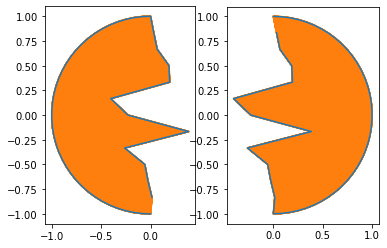

In [23]:
mesh_size = 0.01
surfacemeshes = flatSplitSphere(solution, mesh_size=mesh_size)
for i in range(2):
    A = plt.subplot(1,2,i+1)
    surfacemesh = surfacemeshes[i]
    pl = numpy.array(surfacemesh["polyloop"])
    A.plot(pl[:,0], pl[:,1])
    A.triplot(surfacemesh["pts"][:,0], surfacemesh["pts"][:,1], surfacemesh["tris"])
    A.set_aspect("equal")
